In [10]:
# Importing Libs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline

In [18]:
df = pd.read_csv("C:\\Users\\Yasser Arafat\\Desktop\\FuelConsumptionCo2.csv") # Importing Data
df.head() # Taking a look at the data!

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [20]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [35]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']] # Inserting part of the dataset into cdf(Prob Common Data Frame)
cdf.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


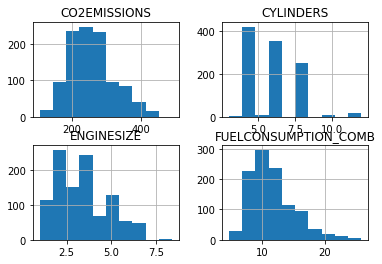

In [46]:
viz = cdf
viz.hist()
plt.show() 

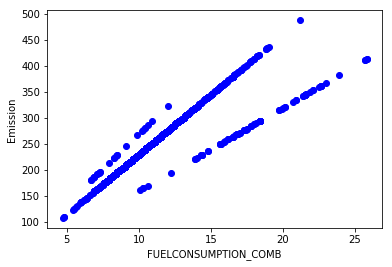

In [67]:
# plot of Engine_Size vs Emission
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

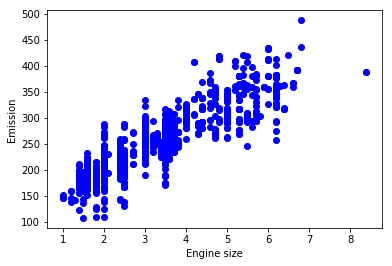

In [68]:
# Plot of Engine Size vs Emissions
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

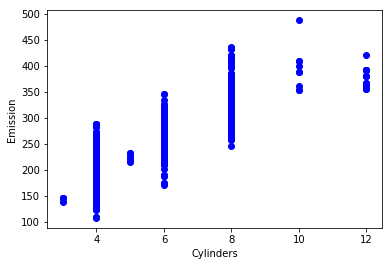

In [53]:
# plot of number of cylinders vs Emission
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color = 'blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

In [65]:
# Splitting dataset , 80% for training and 20% rest for testing!
mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf[~mask]

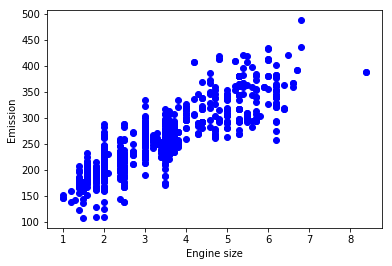

In [71]:
# Checking with train dataset the scatter of Engine_Size vs Emission!
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [85]:
# Using sklearn to model data!
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x,train_y)
print ('Coefficients: ', regr.coef_) # i.e Theta from intercept + coeff*x = y
print ('Intercept: ',regr.intercept_)# i.e intercept from intercept + coeff*x = y

Coefficients:  [[38.84438153]]
Intercept:  [126.46566787]


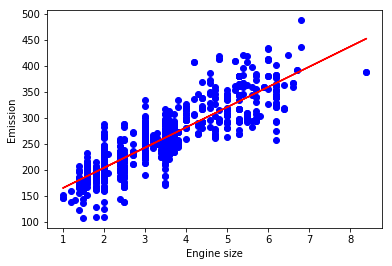

In [87]:
#Plotting the fit line of the linear regression
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') # Here y = train_x*coeff + intercept..like we learnt
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [116]:
# Chechking the accuracy of oor Predicted values using our test data and Mean Squared Error!
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
test_results = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_results - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_results - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_results , test_y))
for i in range(int(len(test_results)*0.2)):
    print("{} compared with {} ".format(round(test_results[i][0],0),test_y[i][0]))

Mean absolute error: 22.80
Residual sum of squares (MSE): 893.00
R2-score: 0.72
220.0 compared with 225 
262.0 compared with 239 
309.0 compared with 354 
282.0 compared with 288 
371.0 compared with 361 
290.0 compared with 336 
328.0 compared with 354 
282.0 compared with 290 
243.0 compared with 285 
204.0 compared with 209 
204.0 compared with 209 
297.0 compared with 281 
360.0 compared with 356 
243.0 compared with 212 
297.0 compared with 317 
297.0 compared with 338 
243.0 compared with 253 
243.0 compared with 255 
204.0 compared with 209 
243.0 compared with 278 
181.0 compared with 212 
220.0 compared with 189 
204.0 compared with 228 
204.0 compared with 225 
266.0 compared with 248 
266.0 compared with 294 
367.0 compared with 382 
367.0 compared with 377 
266.0 compared with 283 
266.0 compared with 269 
181.0 compared with 177 
181.0 compared with 163 
332.0 compared with 380 
332.0 compared with 344 
332.0 compared with 362 
332.0 compared with 380 
313.0 compared with 

# Therefore the Accuracy of our trained model is 72%